In [1]:
!pip install yfinance

In [2]:

import yfinance as yf
from pandas_datareader import data as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

path = "/content/drive/MyDrive/GDP_N225/datasets/"
ticker = "^N225"
start = datetime.date(1980,1,1)
end =  datetime.datetime.now() + datetime.timedelta(days = 1)

yf.pdr_override()
df = pdr.get_data_yahoo(ticker, start, end)


[*********************100%%**********************]  1 of 1 completed


In [3]:
df = df.reset_index()

In [4]:
df["Date"] = pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10773 entries, 0 to 10772
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10773 non-null  datetime64[ns]
 1   Open       10773 non-null  float64       
 2   High       10773 non-null  float64       
 3   Low        10773 non-null  float64       
 4   Close      10773 non-null  float64       
 5   Adj Close  10773 non-null  float64       
 6   Volume     10773 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 589.3 KB


In [5]:
df.to_csv(path + ticker + "_daily_data.csv", encoding="utf8")

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-01-04,6560.160156,6560.160156,6560.160156,6560.160156,6560.160156,0
1,1980-01-07,6552.649902,6552.649902,6552.649902,6552.649902,6552.649902,0
2,1980-01-08,6563.279785,6563.279785,6563.279785,6563.279785,6563.279785,0
3,1980-01-09,6591.830078,6591.830078,6591.830078,6591.830078,6591.830078,0
4,1980-01-10,6594.009766,6594.009766,6594.009766,6594.009766,6594.009766,0


In [7]:
df["POSIX"] = df["Date"].astype(np.int64).values // 10**9
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,POSIX,year,month
0,1980-01-04,6560.160156,6560.160156,6560.160156,6560.160156,6560.160156,0,315792000,1980,1
1,1980-01-07,6552.649902,6552.649902,6552.649902,6552.649902,6552.649902,0,316051200,1980,1
2,1980-01-08,6563.279785,6563.279785,6563.279785,6563.279785,6563.279785,0,316137600,1980,1
3,1980-01-09,6591.830078,6591.830078,6591.830078,6591.830078,6591.830078,0,316224000,1980,1
4,1980-01-10,6594.009766,6594.009766,6594.009766,6594.009766,6594.009766,0,316310400,1980,1


In [9]:
df = df[["Date", "POSIX", "Adj Close", "year", "month"]]
df.head()
df.to_csv(path + ticker + "_daily_data.csv", encoding="utf8")

In [10]:
days = 15

for i in range(1, days):
    df[f"{i}_Adj Close"] = df["Adj Close"].shift(i)
df = df.iloc[days-1:, :]
df.head()

<ipython-input-10-51a1a157cf49>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{i}_Adj Close"] = df["Adj Close"].shift(i)
<ipython-input-10-51a1a157cf49>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{i}_Adj Close"] = df["Adj Close"].shift(i)
<ipython-input-10-51a1a157cf49>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

,Date,POSIX,Adj Close,year,month,1_Adj Close,2_Adj Close,3_Adj Close,4_Adj Close,5_Adj Close,6_Adj Close,7_Adj Close,8_Adj Close,9_Adj Close,10_Adj Close,11_Adj Close,12_Adj Close,13_Adj Close,14_Adj Close
14,1980-01-25,317606400,6767.709961,1980,1,6746.930176,6694.189941,6684.589844,6666.270020,6649.299805,6656.299805,6653.259766,6659.549805,6615.509766,6594.009766,6591.830078,6563.279785,6552.649902,6560.160156
15,1980-01-28,317865600,6763.609863,1980,1,6767.709961,6746.930176,6694.189941,6684.589844,6666.270020,6649.299805,6656.299805,6653.259766,6659.549805,6615.509766,6594.009766,6591.830078,6563.279785,6552.649902
16,1980-01-29,317952000,6770.830078,1980,1,6763.609863,6767.709961,6746.930176,6694.189941,6684.589844,6666.270020,6649.299805,6656.299805,6653.259766,6659.549805,6615.509766,6594.009766,6591.830078,6563.279785
17,1980-01-30,318038400,6776.600098,1980,1,6770.830078,6763.609863,6767.709961,6746.930176,6694.189941,6684.589844,6666.270020,6649.299805,6656.299805,6653.259766,6659.549805,6615.509766,6594.009766,6591.830078
18,1980-01-31,318124800,6768.160156,1980,1,6776.600098,6770.830078,6763.609863,6767.709961,6746.930176,6694.189941,6684.589844,6666.270020,6649.299805,6656.299805,6653.259766,6659.549805,6615.509766,6594.009766


In [11]:
df.to_csv(path + ticker + "_daily_data_2.csv", encoding="utf8")

In [12]:
N = len(df["POSIX"])
N_train = round(N * .8)


In [13]:
X = df.drop(["Adj Close", "Date"], axis=1).values
X

array([[3.17606400e+08, 1.98000000e+03, 1.00000000e+00, ...,
        6.56327979e+03, 6.55264990e+03, 6.56016016e+03],
       [3.17865600e+08, 1.98000000e+03, 1.00000000e+00, ...,
        6.59183008e+03, 6.56327979e+03, 6.55264990e+03],
       [3.17952000e+08, 1.98000000e+03, 1.00000000e+00, ...,
        6.59400977e+03, 6.59183008e+03, 6.56327979e+03],
       ...,
       [1.69706880e+09, 2.02300000e+03, 1.00000000e+01, ...,
        3.26786191e+04, 3.24024102e+04, 3.25710293e+04],
       [1.69715520e+09, 2.02300000e+03, 1.00000000e+01, ...,
        3.23150508e+04, 3.26786191e+04, 3.24024102e+04],
       [1.69741440e+09, 2.02300000e+03, 1.00000000e+01, ...,
        3.23719004e+04, 3.23150508e+04, 3.26786191e+04]])

In [14]:
y = df["Adj Close"].values
y.shape

(10759,)

In [15]:
X_train, y_train = X[:N_train], y[:N_train]
X_test, y_test = X[N_train:], y[N_train:]

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [17]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100,
                           random_state=0)


rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [18]:
y_pred = rf.predict(X_test)


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

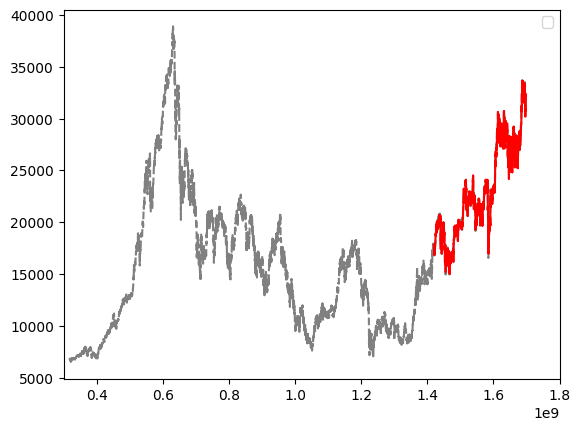

In [20]:
plt.plot(X, y, color="grey", linestyle="--")
plt.plot(X_test, y_pred, color="red")
plt.legend()
plt.xlim([.3e9, 1.8e9])
plt.show()

In [ ]:
rf2 = RandomForestRegressor(n_estimators=100)
rf2.fit(X_train_std, y_train)

RandomForestRegressor()

In [ ]:
y_pred = rf2.predict(X_test_std)

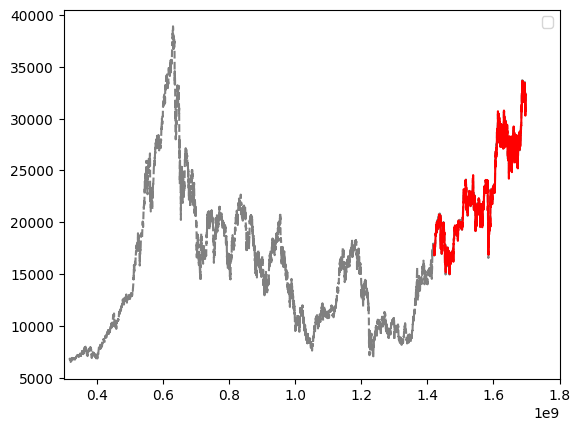

In [ ]:
plt.plot(X, y, color="grey", linestyle="--")
plt.plot(X_test, y_pred, color="red")
plt.xlim([.3e9, 1.8e9])
plt.legend()
plt.show()

In [ ]:
print("Original")
print(f"Train R2: {rf.score(X_train, y_train):.4f}")
print(f"Test R2: {rf.score(X_test, y_test):.4f}")
print("---------------------------------------------")
print("Std")
print(f"Train R2: {rf.score(X_train_std, y_train):.4f}")
print(f"Test R2: {rf.score(X_test_std, y_test):.4f}")


Original
Train R2: 0.9998
Test R2: 0.9939
---------------------------------------------
Std
Train R2: -1.8031
Test R2: -14.0130
